### ***MRI Appointment No-Show Prediction***
##### Exploratory Data Analysis + Statistical Testing + Predictive Modelling  
##### Author: Prashasti Hajela

###**Project Overview**: Healthcare No-Show Prediction: EDA + Feature Engineering + Predictive Modelling  

Missed/ No-show appointments create serious operational and financial challenges for healthcare systems.
Hospitals lose revenue, staff time is wasted, and patients experience delayed care. In Radiology/ Imaging departments, a single no-show can disrupt the entire day's schedule and waste high-value scanner time.

This project explores the Kaggle “No-Show Appointments” dataset and enhances it with synthetic features relevant to real clinical workflows.
The goal is to understand which patient patterns contribute to no-shows and how healthcare organizations can proactively intervene.

This analysis forms the foundation for a predictive model that will later be integrated into a Power Apps scheduling solution to alert staff when a patient is high-risk while scheduling.



### **Dataset** **Overview**
Original Kaggle Dataset Includes:

- PatientID
- AppointmentID
- Gender
- ScheduledDay
- AppointmentDay
- Age
- Neighbourhood
- Scholarship
- Hypertension
- Diabetes
- Alcoholism
- Handicap
- SMS_received
- No-show

Dataset source (Kaggle): https://www.kaggle.com/datasets/joniarroba/noshowappointments

####**Synthetic Features**: To bring this dataset closer to a real clinical scheduling environment, the following synthetic fields were added:

- AgeGroup: Grouped age for better visualization
- Medical_Transport: Whether patient relies on NMET services.
- Reminder_Channel: Primary reminder channel used for patient among SMS, Phone, Email, None
- Pt_confirmed: Whether patient confirmed the appointment
- First_Visit: Whether this is their first time at clinic/ facility
- Appointment_Day: Extracted day of the week
- WaitingDays: Days between scheduling and appointment

These enriched features make the dataset more relevant for machine-learning and operational analysis in imaging scheduling.

### **Goal of the Project**
This analysis aims to answer:

1. Which patient agegroups have higher no-show rates?
2. Do reminder methods reduce no-shows?
3. Does relying on medical transport increase missed appointments?
4. How does waiting time between scheduling and appointment (WaitingDays) affect attendance?
5. How many patient confirmed their appointment and still No-showed?
6. For first-time visitors (First_Visit), do they attend or miss appointments more often?
7. Does the Appointment_Day influence no-show behavior?
8. Which features should be included in a predictive ML model?

### ***Import Libraries***

In [118]:
import pandas as pd                                   # Pandas handles data loading, cleaning, transformation, and analysis.

In [119]:
import numpy as np                                   #library used for numerical calculations

In [120]:
import random                                      # Python’s built-in random number generator, lets you create random values

In [121]:
import matplotlib.pyplot as plt                    # plt allows us to create all the visual graphs needed for EDA and model interpretation.

In [122]:
import seaborn as sns                               ## Seaborn is a visualization library built on top of Matplotlib. provides easy-to-use functions for statistical plots.

sns.set_theme(style='darkgrid', palette='Set2')     # default styling for all plots

In [123]:
from scipy.stats import chi2_contingency

In [124]:
# Sklearn for Preprocessing and Modeling
from sklearn.model_selection import train_test_split                        #Divides the data into training and testing sets for unbiased model evaluation.
from sklearn.linear_model import LogisticRegression                         # Baseline classification model; useful for interpretability.
from sklearn.ensemble import RandomForestClassifier                         # Ensemble tree model that captures nonlinear patterns and handles imbalance better.
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, classification_report,accuracy_score, precision_recall_curve

# High-Performance Model
import xgboost as xgb
from xgboost import XGBClassifier                                 # Gradient boosting classifier; often achieves best performance on structured data.

In [125]:
from imblearn.over_sampling import SMOTE          #SMOTE - Synthetic Minority Oversampling Technique. fixes imbalanced datasets.

### ***Load Dataset***

In [126]:
df = pd.read_csv('/Users/prashastihajela/Downloads/KaggleV2-May-2016.csv') #Load the original Kaggle dataset. Dataset link: https://www.kaggle.com/datasets/joniarroba/noshowappointments

In [127]:
df.head()         #displays the first 5 rows (default) of dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### ***Data Cleaning***

In [128]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}) ## Renaming column

In [129]:
print("Shape of dataset:", df.shape) # Check overall shape of the dataset

Shape of dataset: (110527, 14)


In [130]:
print("Missing values in each column:")  # Check for missing values in dataset
print(df.isnull().sum())

Missing values in each column:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64


In [131]:
print("Total duplicate rows:", df.duplicated().sum())       # Check for duplicate records

Total duplicate rows: 0


In [132]:
df[df['Age']>100].head()        #display rows where Age >100

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No


#### Age Outlier Handling

- The dataset includes 5 records where Age > 100.
- One patient (Age 115) appears 4 times with different appointment ID, showing 3 missed visits.
- These are retained for analysis because:
  - They represent a realistic pattern of elderly patient no-shows
  - Dropping would remove meaningful behavioral insight

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [134]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.tz_localize(None) ## Convert column into  datetime type, dt.tz_localize(None) removes the timezone and ensures clean subtraction.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.tz_localize(None)
df['Gender'] = df['Gender']. astype(object)
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})      # convert No-show to numeric form

In [135]:
df.describe()       # generates summary statistics for all numeric columns in dataframe.

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,2016-05-09 07:49:15.846273024,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
min,3.921784e+04,5.030230e+06,2015-11-10 07:13:56,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,2016-04-29 10:27:01,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,2016-05-10 12:13:17,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,2016-05-20 11:18:37,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,2016-06-08 20:07:23,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000
std,2.560949e+14,7.129575e+04,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444


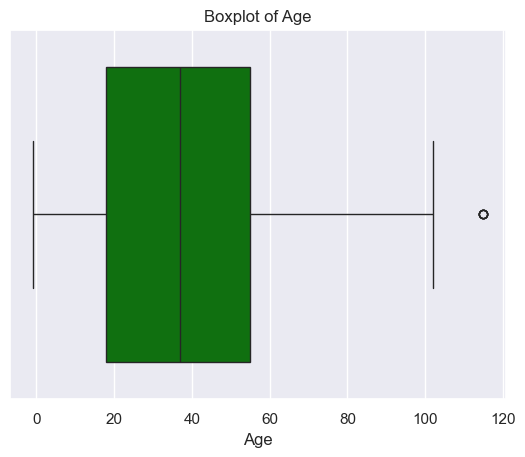

In [136]:
sns.boxplot(data=df, x='Age', color='green')
plt.title('Boxplot of Age')
plt.show()

In [137]:
df[df['Age']<0].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,0


In [138]:
df[df['Age']>100].head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,0
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,1
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,1
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,1
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,0


In [139]:
df = df[df['Age'] >= 0] # Removing row with Age = -1

- There are some age outliers (above 100), but most patients are between 20 and 60.
- We removed invalid entries like Age = -1.
- We keep rows over Age = 100, as it's the same patient with different appt times.


In [140]:
df = df.drop(columns = ['PatientId'])  #drop unnecessary columns
df = df.drop(columns = ['AppointmentID'])

In [141]:
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [142]:
age_bin = [0,18,40,65,120]      # Create bins for age ranges
age_labels = ['Kids','Adults', 'Mid-age', 'Old']      #labels for bins, always 1 less than no of bins
df['AgeGroup'] = pd.cut(df['Age'], bins = age_bin, labels= age_labels,include_lowest=True)    # pd.cut() takes a continuous variable (eg: Age) and turns it into categorical bins.

#### Age Distribution and Impact on No-show


In [143]:
df_Noshow_Agegroup = pd.crosstab(df['AgeGroup'], df['No-show'])         #Creates a frequency table showing: # of patients showed and No-showed for each AgeGroup
df_Noshow_Agegroup = df_Noshow_Agegroup.rename(columns={0:'Showed', 1:'No-showed'})         #renaming columns
print(df_Noshow_Agegroup)

No-show   Showed  No-showed
AgeGroup                   
Kids       22519       6347
Adults     24442       7375
Mid-age    30011       6531
Old        11235       2066


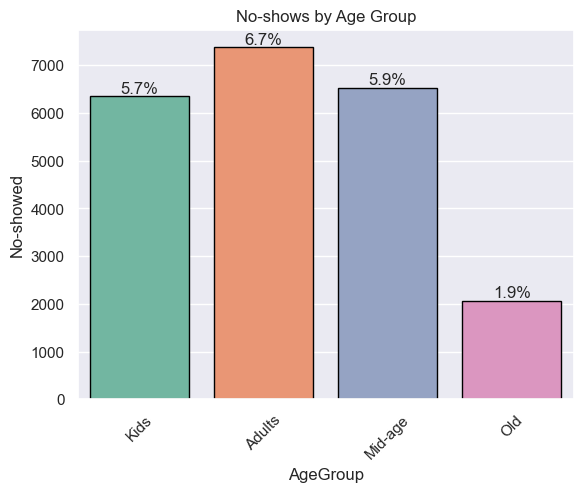

In [144]:
ax = sns.barplot(data=df_Noshow_Agegroup, x='AgeGroup', y='No-showed',hue ='AgeGroup', palette= 'Set2', edgecolor='black')
for container in ax.containers:
  ax.bar_label(container, labels = [f'{(v.get_height()/len(df))*100:.1f}%'for v in container])
plt.title('No-shows by Age Group')
plt.xticks(rotation=45)
plt.show()

In [145]:
chi2, p, dof, expected = chi2_contingency(df_Noshow_Agegroup) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)                        ##Chi-square test only works on pure frequency tables with no extra columns. only counts, Na total, Na percentage, Na calculated columns

p < 0.05 - Significant association. Keep this feature.
1.164526240486995e-115


- **Observation:** While Mid-age and Adults have the most no-shows, Kids also show significant dropout.Percentages show what share of total no-shows each age group contributes.
- **Chi-square p-value** < 0.05 confirms AgeGroup has a statistically significant effect on No-show status.


Text(0.5, 1.0, 'No-show Count')

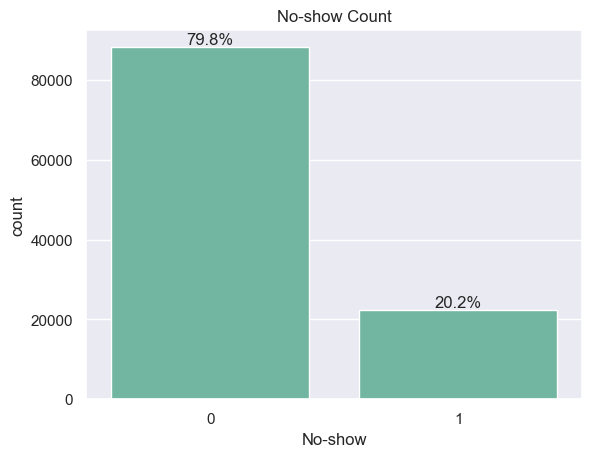

In [146]:
ax = sns.countplot(data=df, x='No-show')
for container in ax.containers:
  ax.bar_label(container, labels = [f'{(v.get_height()/len(df))*100:.1f}%'for v in container])
plt.title('No-show Count')

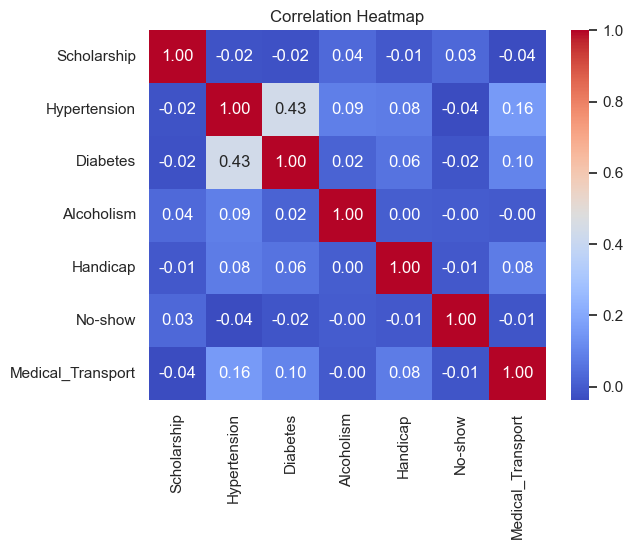

In [226]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt= ".2f")
plt.title("Correlation Heatmap")
plt.show()

**Analyzing Scholarship column**

In [148]:
df_Scholarship_Noshow = pd.crosstab(df['Scholarship'], df['No-show'])
df_Scholarship_Noshow = df_Scholarship_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Scholarship_Noshow)

No-show      Showed  No-showed
Scholarship                   
0             79924      19741
1              8283       2578


In [149]:
chi2, p, dof, expected = chi2_contingency(df_Scholarship_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
3.9268156991039656e-22


In [150]:
df_Scholarship_Noshow['No-showed %'] = (df_Scholarship_Noshow['No-showed']/ (df_Scholarship_Noshow['Showed'] + df_Scholarship_Noshow['No-showed']) *100).round(1)
print(df_Scholarship_Noshow)

No-show      Showed  No-showed  No-showed %
Scholarship                                
0             79924      19741         19.8
1              8283       2578         23.7


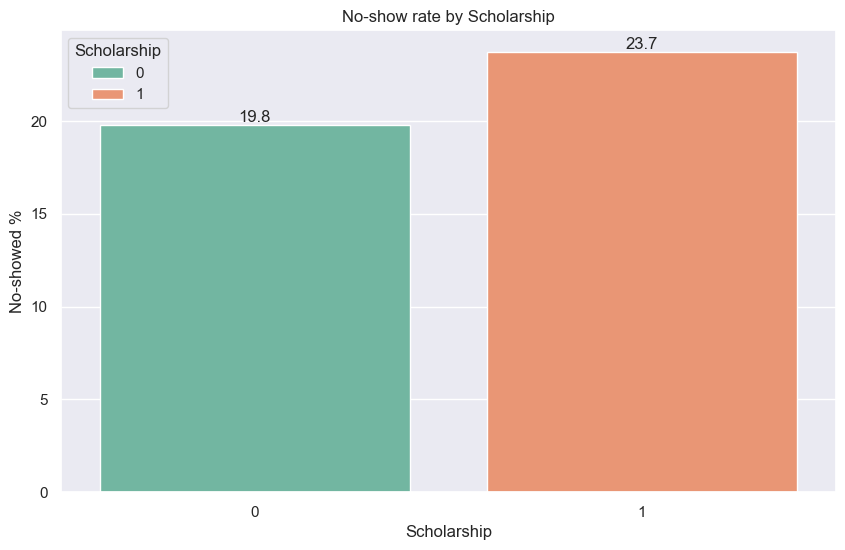

In [151]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_Scholarship_Noshow, x = 'Scholarship', y = 'No-showed %',hue ='Scholarship', palette= 'Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Scholarship')
plt.show()

- Patients who received scholarship had a **higher no-show rate (23.7%)** than those who did not (19.8%).
- Chi-square p-value confirms this difference is statistically significant (p < 0.05).
- Hospitals may need to investigate if socioeconomic factors influence attendance.


**Analyzing Hypertension column**

In [152]:
df_Hypertension_Noshow = pd.crosstab(df['Hypertension'], df['No-show'])
df_Hypertension_Noshow = df_Hypertension_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Hypertension_Noshow)

No-show       Showed  No-showed
Hypertension                   
0              70178      18547
1              18029       3772


In [153]:
chi2, p, dof, expected = chi2_contingency(df_Hypertension_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
1.9011212241495915e-32


- p-value < 0.05 indicates Hypertension status is significantly associated with no-shows.


In [154]:
df_Hypertension_Noshow['No-showed %'] = (df_Hypertension_Noshow['No-showed']/ (df_Hypertension_Noshow['Showed'] + df_Hypertension_Noshow['No-showed'])*100).round(1)
print(df_Hypertension_Noshow)

No-show       Showed  No-showed  No-showed %
Hypertension                                
0              70178      18547         20.9
1              18029       3772         17.3


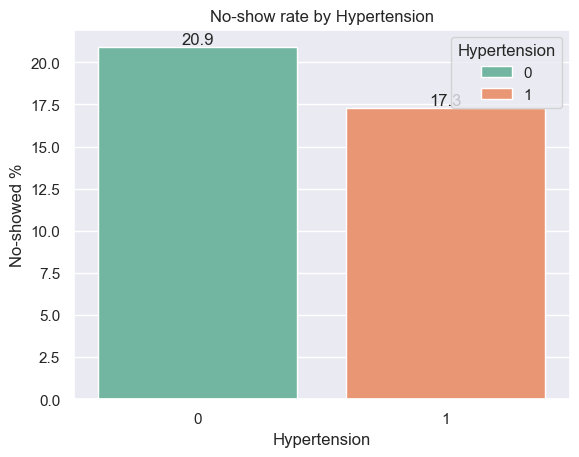

In [155]:
ax = sns.barplot(data = df_Hypertension_Noshow, x = 'Hypertension', y = 'No-showed %', hue='Hypertension', palette= 'Set2')

for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Hypertension')
plt.show()

- Patients with hypertension have a **lower no-show rate (17.3%)** compared to those without (20.9%).

**Analyzing Diabetes column**

In [156]:
df_Diabetes_Noshow = pd.crosstab(df['Diabetes'], df['No-show'])
df_Diabetes_Noshow  = df_Diabetes_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Diabetes_Noshow)

No-show   Showed  No-showed
Diabetes                   
0          81694      20889
1           6513       1430


In [157]:
chi2, p , dof, expected = chi2_contingency(df_Diabetes_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
4.83964682088023e-07


In [158]:
df_Diabetes_Noshow['No-showed %'] = (df_Diabetes_Noshow['No-showed']/ (df_Diabetes_Noshow['Showed'] + df_Diabetes_Noshow['No-showed']) *100).round(1)
print(df_Diabetes_Noshow)

No-show   Showed  No-showed  No-showed %
Diabetes                                
0          81694      20889         20.4
1           6513       1430         18.0


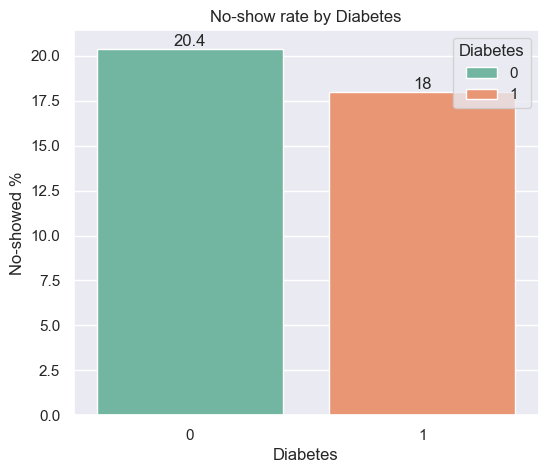

In [159]:
plt.figure(figsize=(6,5))
ax = sns.barplot(data = df_Diabetes_Noshow, x = 'Diabetes', y = 'No-showed %', hue = 'Diabetes', palette= 'Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Diabetes')
plt.show()

- Patients with diabetes have a slightly **lower no-show rate (18%)** compared to non-diabetic patients (20.4%).
- This may reflect better follow-up adherence due to ongoing care routines.
- Since **p < 0.05**, the difference in no-show rates between diabetic and non-diabetic patients is statistically significant.

**Analyzing Alcoholism column**

In [160]:
df_Alcoholism_Noshow = pd.crosstab(df['Alcoholism'], df['No-show'])
df_Alcoholism_Noshow = df_Alcoholism_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
print(df_Alcoholism_Noshow)

No-show     Showed  No-showed
Alcoholism                   
0            85524      21642
1             2683        677


In [161]:
chi2, p, dof, expected = chi2_contingency(df_Alcoholism_Noshow)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

Not significant.
0.9652054249010444


In [162]:
df_Alcoholism_Noshow['No-showed %'] = (df_Alcoholism_Noshow['No-showed']/ (df_Alcoholism_Noshow['Showed'] + df_Alcoholism_Noshow['No-showed']) *100).round(1)
print(df_Alcoholism_Noshow)

No-show     Showed  No-showed  No-showed %
Alcoholism                                
0            85524      21642         20.2
1             2683        677         20.1


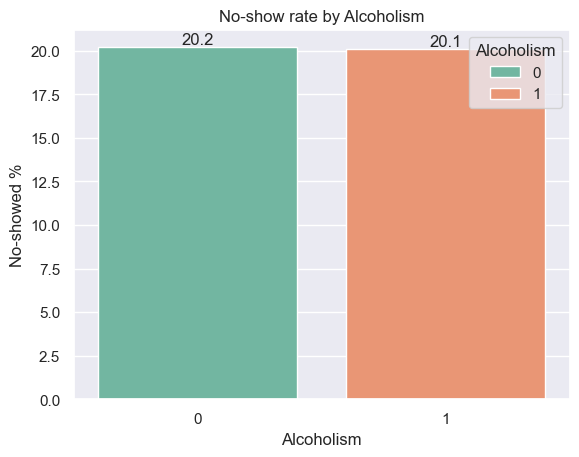

In [163]:
ax = sns.barplot(data = df_Alcoholism_Noshow, x = 'Alcoholism', y = 'No-showed %', hue = 'Alcoholism', palette= 'Set2')

for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Alcoholism')
plt.show()

- The no-show rates are almost the same for both groups (~20%).
- This suggests alcoholism status does not strongly influence attendance patterns in this dataset.

**Analyzing Handicap column**

In [164]:
df_Handicap_Noshow = pd.crosstab(df['Handicap'], df['No-show']).reset_index()
df_Handicap_Noshow = df_Handicap_Noshow.rename(columns={0:'Showed', 1:'No-showed'})
df_Handicap_Noshow['No-showed %'] = (df_Handicap_Noshow['No-showed']/ (df_Handicap_Noshow['Showed'] + df_Handicap_Noshow['No-showed'])*100).round(1)
print(df_Handicap_Noshow)

No-show  Handicap  Showed  No-showed  No-showed %
0               0   86373      21912         20.2
1               1    1676        366         17.9
2               2     146         37         20.2
3               3      10          3         23.1
4               4       2          1         33.3


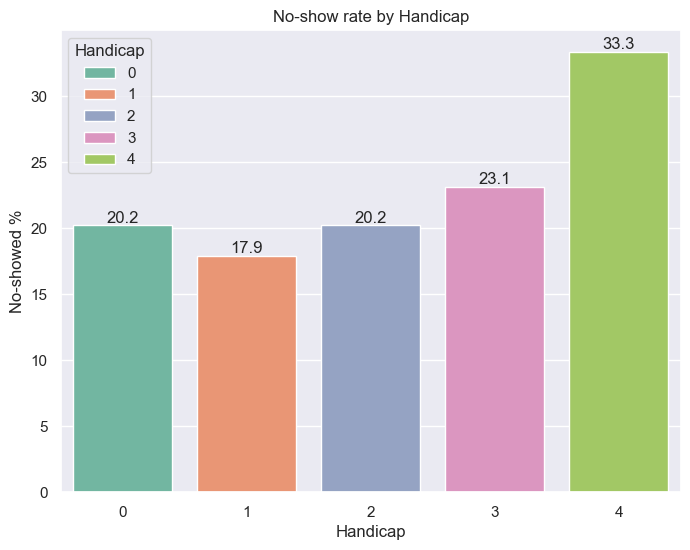

In [165]:
plt.figure(figsize=(8,6))
ax = sns.barplot(data = df_Handicap_Noshow, x = 'Handicap', y = 'No-showed %', hue = 'Handicap', palette= 'Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Handicap')
plt.show()

**Interpretation:**
- Handicap = 0 and 2 (20.2% no-shows)
- Handicap = 1, slightly lower at 17.9%
- Handicap = 4, highest at 33.3%

This suggests that patients with higher handicap levels may have more challenges reaching their appointments.

In [166]:
df_Handicap_Noshow_chi = pd.crosstab(df['Handicap'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Handicap_Noshow_chi)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)


Not significant.
0.13401931354992297


**Chi-square p-value = 0.134** p-value > 0.05, the difference in no-show rates across handicap levels is **not statistically significant**.  
However, the upward trend still provides valuable operational insight.

### ***Waiting Days*** (Appoitment Day - Scheduled Day)

In [167]:
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [168]:
df['WaitingDays'].isnull().sum()

np.int64(0)

In [169]:
df['WaitingDays'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: WaitingDays, dtype: float64

In [170]:
WTdays_bin = [-7,0,7,30,60,90, 178]
WTdays_labels = ['Same Day', 'Week', 'Month', '2 Months', '3 Months', '3 Months+']
df['WaitingDays'] = pd.cut(df['WaitingDays'], bins = WTdays_bin, labels= WTdays_labels, include_lowest=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup,WaitingDays
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Mid-age,Same Day
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Mid-age,Same Day
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Mid-age,Same Day
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Kids,Same Day
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Mid-age,Same Day


In [171]:
print("Missing values in New dataset:")  # Check for missing values in new df
print(df.isnull().sum())

Missing values in New dataset:
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
AgeGroup          0
WaitingDays       0
dtype: int64


In [172]:
df['WaitingDays'].value_counts()

WaitingDays
Same Day     43780
Week         29304
Month        27736
2 Months      7746
3 Months      1799
3 Months+      161
Name: count, dtype: int64

In [173]:
df_WTdays_NS_ct = pd.crosstab(df['WaitingDays'],df['No-show']).reset_index()
df_WTdays_NS_ct = df_WTdays_NS_ct.rename(columns={0:'Showed', 1:'No-showed'})
df_WTdays_NS_ct['No-show %'] = (df_WTdays_NS_ct['No-showed']/(df_WTdays_NS_ct['Showed']+ df_WTdays_NS_ct['No-showed'])*100).round(1)
print(df_WTdays_NS_ct)

No-show WaitingDays  Showed  No-showed  No-show %
0          Same Day   40870       2910        6.6
1              Week   21975       7329       25.0
2             Month   18861       8875       32.0
3          2 Months    5106       2640       34.1
4          3 Months    1278        521       29.0
5         3 Months+     117         44       27.3


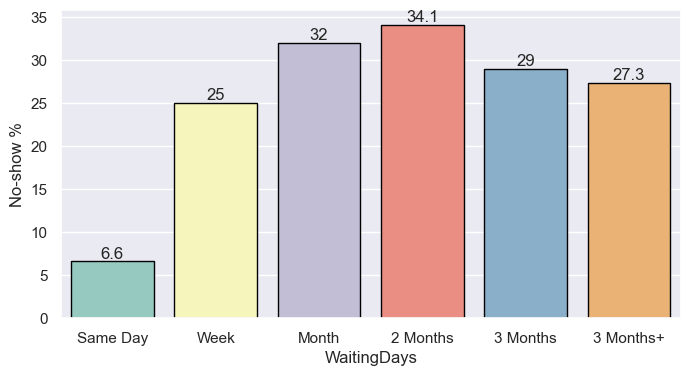

In [174]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data = df_WTdays_NS_ct, x = 'WaitingDays', y = 'No-show %', hue ='WaitingDays', palette= 'Set3', edgecolor='black')
for container in ax.containers:
  ax.bar_label(container)
plt.show()

In [175]:
df_WTdays_NS_chi = pd.crosstab(df['WaitingDays'],df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_WTdays_NS_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


- Patients who waited 1–2 months had the highest no-show rates (up to 34%).
- Chi-square test confirms waiting days is a statistically significant predictor.

Analyzing Impact of Appointment Day on No-show rate

In [176]:
df['Appointment_Day'] = df['AppointmentDay'].dt.day_name()

In [177]:
df_Apptday_NS_ct = pd.crosstab(df['Appointment_Day'], df['No-show']).reset_index()
df_Apptday_NS_ct = df_Apptday_NS_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_Apptday_NS_ct['No-show %'] = (df_Apptday_NS_ct['No-showed']/(df_Apptday_NS_ct['Showed'] + df_Apptday_NS_ct['No-showed'])*100).round(2)
print(df_Apptday_NS_ct)

No-show Appointment_Day  Showed  No-showed  No-show %
0                Friday   14982       4037      21.23
1                Monday   18024       4690      20.65
2              Saturday      30          9      23.08
3              Thursday   13909       3338      19.35
4               Tuesday   20488       5152      20.09
5             Wednesday   20774       5093      19.69


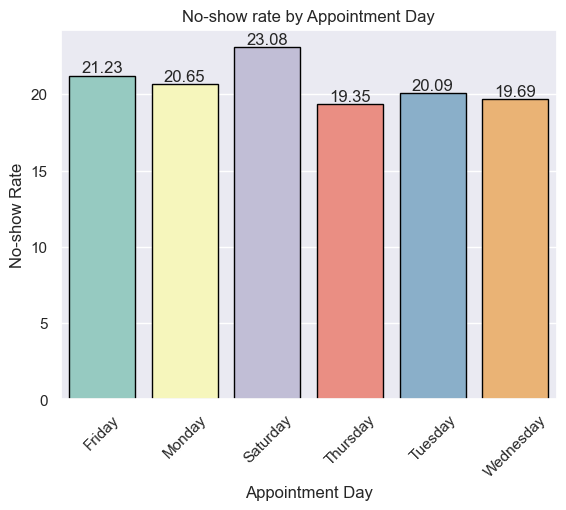

In [178]:
ax = sns.barplot(data=df_Apptday_NS_ct, x='Appointment_Day', y='No-show %',hue = 'Appointment_Day', palette='Set3',edgecolor='black')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show rate by Appointment Day')
plt.xticks(rotation=45)
plt.xlabel('Appointment Day')
plt.ylabel('No-show Rate')
plt.show()

In [179]:
df_Apptday_NS_chi = pd.crosstab(df['Appointment_Day'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Apptday_NS_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
4.5990638655592554e-05


- Patients scheduled on **Saturday** had the highest no-show rate (23.1%), but sample size is very small.
- Weekdays like **Friday** and **Monday** show slightly elevated no-shows.

**Adding Synthetic Data**
These reflect real-world scheduling behaviors and will help in prediction. Factors like medical transport reliance, appointment confirmed yet no showed, and first-visit anxiety are commonly observed in hospitals and clinics.

These features will help:
1.  Make the dataset more realistic
2.  Improve the accuracy of prediction models
3.  Support real-life scenario planning for apps like Appointment scheduling tools




#### **1. Medical_Transport**
Does Medical Transport Reduce No-Shows?

Context: Medical transportation is often offered to elderly or disabled patients but is it being used effectively? And more importantly, does it reduce missed appointments?
This synthetic column flag if a patient likely required medical transport to reach their appointment. In real-world healthcare systems, **medical transportation is one of the most cited barriers** to appointment attendance, especially for elderly or disabled patients.
Many low-income, elderly, or disabled patients rely on Non-Emergency Medical Transportation (NEMT) vans. Delays, miscommunication, or lack of coverage can cause them to miss appointments even if they had full intent to show up. Adding this column improves the **predictive power** and **realism** of our model.

####Assumptions
We used patient **Age** and **Handicap** status to determine the chance of needing medical transport:
- 40–60% of patients who are elderly (85+) or have a disability (Handicap > 0) use medical transport.
- Others using may include Medicaid transport vans or Non-Emergency Medical Transport

<h4>Real-World Insight:</h4>

*   Transportation barriers is one of the cited reasons for missed healthcare appointments.
*   Patients dependent on medical vans are at higher risk of no-shows, especially in cases of delay or miscommunication.
* Incorporating this into our predictive model adds both realism and policy relevance.

<h4>Future Consideration:</h4>

- Healthcare providers could reduce no-shows by partnering with platforms like [RoundTrip Health](https://roundtriphealth.com) to proactively coordinate patient transport.

According to the CDC and National Academies, **3.6 million people in the U.S. miss or delay medical care annually due to transportation barriers**.
Further, research published in [BMC Public Health (2020)](https://pmc.ncbi.nlm.nih.gov/articles/PMC7204444/) found that **lack of transport access was a major reason for missed appointments**, especially among patients with mental health or economic challenges.
These statistics show the importance of including medical transport in our predictive model — not just as a health equity issue, but as a practical scheduling factor.


In [180]:
# Set seed for reproducibility
np.random.seed(42)

In [181]:
def assign_medical_transport(row):
   if row['Age'] >=85 and row['Handicap'] > 2:   #Very elderly and highly disabled
    return (int(np.random.rand() <0.80))
   elif row['Age'] >=70 and row['Handicap'] < 3:   #Elderly with mild/moderate disability
    return (int(np.random.rand() <0.60))
   elif row['Age'] <18:                     #Kids usually don't use transport alone
    return (int(np.random.rand() <0.02))
   elif row['Age'] <70 and row['Handicap'] == 0:   #Adults & healthy
    return (int(np.random.rand() <0.10))
   elif row['Age'] <70 and row['Handicap'] >= 3:       # Adults but severely disabled
    return (int(np.random.rand() <0.30))
   elif row['Age'] < 70 and 0 < row['Handicap'] < 3:       # Adult with mild/moderate disability
        return int(np.random.rand() < 0.25)
   else:                                        # Others- 15%
    return (int(np.random.rand() < 0.15))

np.random.seed(42)
df['Medical_Transport'] = df.apply(assign_medical_transport, axis =1)

In [182]:
def Handicap_Old(row):         ### %age of >= Age group and Handicap group
  if row['Age'] >=70 and row['Handicap'] > 0:
    return 'Elderly and Disabled'
  elif row['Age']>=70:
    return 'Only Elderly'
  elif row['Handicap'] > 0:
    return 'Only Disabled'
  else:
    return 'Neither'

df['Handicap/Old'] = df.apply(Handicap_Old, axis=1)

print(df['Handicap/Old'].value_counts(normalize=True))

Handicap/Old
Neither                 0.900286
Only Elderly            0.079438
Only Disabled           0.015598
Elderly and Disabled    0.004678
Name: proportion, dtype: float64


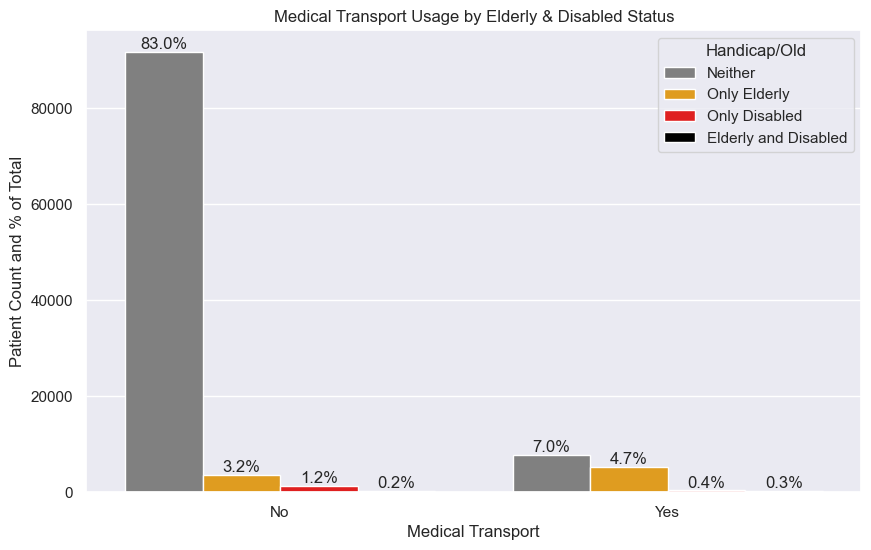

In [183]:
MT_colors = { 'Neither': 'Grey', 'Only Elderly': 'Orange', 'Only Disabled': 'red', 'Elderly and Disabled': 'Black'}
df['MT_Label'] = df['Medical_Transport'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x='MT_Label',hue= 'Handicap/Old',  palette=MT_colors,  order = df['MT_Label'].value_counts().index)
for container in ax.containers:
    ax.bar_label(container, labels= [f'{(v.get_height()/len(df))*100:.1f}%'for v in container])
plt.title('Medical Transport Usage by Elderly & Disabled Status')
plt.xlabel('Medical Transport')
plt.ylabel('Patient Count and % of Total')
plt.show()


### Graph - Medical Transport Usage by Elderly & Disabled Status
Despite common assumptions, the majority of patients who use medical transport are neither elderly nor physically disabled.
This suggests:
- Many adult patients also face mobility/access issues
- Social drivers of health like income, access, and distance might be at play
- Insurance programs (like Medicaid) might cover transport for more than just elderly

The bar chart confirms **7% of all patients using medical transport** belong to the ‘Neither’ group.

Suggestion: Healthcare providers could reduce no-shows by partnering with platforms like RoundTrip Health to proactively coordinate patient transport.

In [184]:
df_MT_filtered = df[df['Medical_Transport']==1].copy() ## Filtered dataframe, where Medical Transport = 1 (Medical Transport used)
(df_MT_filtered.head())

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup,WaitingDays,Appointment_Day,Medical_Transport,Handicap/Old,MT_Label
5,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,Old,Week,Friday,1,Only Elderly,Yes
6,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,Adults,Week,Friday,1,Neither,Yes
10,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,0,Adults,Week,Friday,1,Neither,Yes
29,F,2016-04-29 15:16:29,2016-04-29,32,SANTA MARTHA,0,0,0,0,0,0,0,Adults,Same Day,Friday,1,Neither,Yes
32,M,2016-04-29 07:30:27,2016-04-29,61,SÃO CRISTÓVÃO,0,1,0,0,0,0,0,Mid-age,Same Day,Friday,1,Neither,Yes


In [185]:
MTusers_Noshowed = pd.crosstab(df_MT_filtered['No-show'],df_MT_filtered['Handicap/Old'])
print(MTusers_Noshowed)

Handicap/Old  Elderly and Disabled  Neither  Only Disabled  Only Elderly
No-show                                                                 
0                              256     6163            322          4415
1                               63     1616             68           820


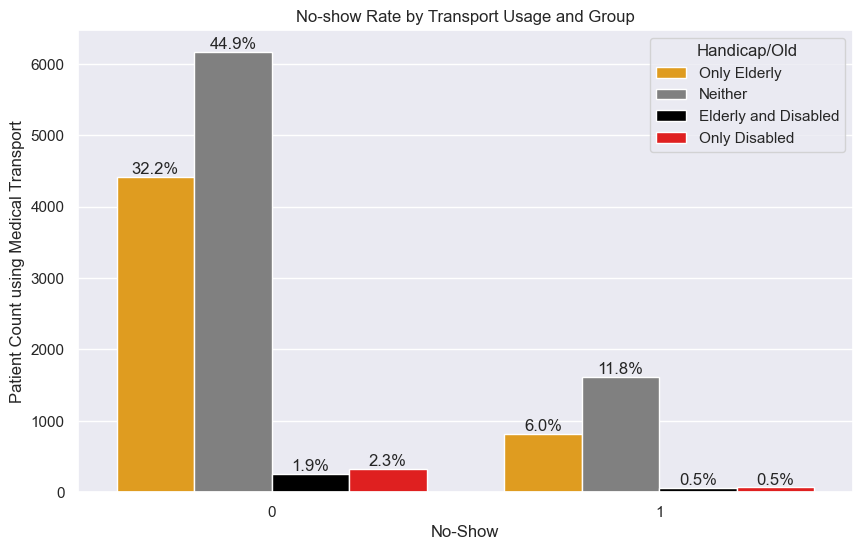

In [186]:
plt.figure(figsize=(10,6))   #### Using df = df_MT_filtered, where Medical Transport = 1
ax = sns.countplot(data = df_MT_filtered, x = 'No-show',hue= 'Handicap/Old', palette= MT_colors, order = df['No-show'].value_counts().index)
for container in ax.containers:
  ax.bar_label(container, labels= [f'{(v.get_height()/len(df_MT_filtered))*100:.1f}%'for v in container])
sns.set_palette("Set1")
plt.title("No-show Rate by Transport Usage and Group")
plt.xlabel('No-Show')
plt.ylabel('Patient Count using Medical Transport')
plt.show()

#### Graph - No-show due to Medical Transport
This chart reveals how often patients (where the patient is either >=70 or disabled or neither) who used medical transport still ended up missing their appointment.

- The majority of no-shows are from patients who are neither old nor disabled but use medical transport. This challenges the common assumption that transport support is only relevant for elderly/disabled groups.
- Hospitals could offer transport and also track **confirmation + successful pickup**.
- Partnering with **RoundTrip Health**, Uber Health, or local Medicaid ride vendors could help **reduce transport-related no-shows** by 10–15%.

In [187]:
chi2, p, dof, expected = chi2_contingency(MTusers_Noshowed)  ## Medical Transport and No-show have a statistically significant relationship as chi-square p < 0.05
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
9.323209738181208e-12


### Heatmap Summary: Transport Usage vs. No-Show

In [188]:
## creating dataframe df_MTusage for further analsis
df_MTusage = pd.crosstab([df['AgeGroup'],df['Handicap/Old']], df['Medical_Transport'] )
df_MTusage = df_MTusage.rename(columns={0: 'MT_No', 1: 'MT_Yes'})
df_MTusage['Total_Pt'] = df_MTusage['MT_No'] + df_MTusage['MT_Yes']
df_MTusage['Groupwise_MT_Usage_%'] = (df_MTusage['MT_Yes']/df_MTusage['Total_Pt']) * 100
df_MTusage['Overall_transport_usage_%'] = (df_MTusage['MT_Yes']/(len(df)))*100
df_MTusage['Group_NoShowRate'] = ((df.groupby(['AgeGroup', 'Handicap/Old'], observed=True)['No-show'].sum())/df_MTusage['Total_Pt']) *100
df_MTusage['MT_NoShowRate'] = ((df[df['Medical_Transport']==1].groupby(['AgeGroup', 'Handicap/Old'], observed=True)['No-show'].sum())/df_MTusage['MT_Yes'])*100
df_MTusage.head(10)

Medical_Transport              MT_No  MT_Yes  Total_Pt  Groupwise_MT_Usage_%  \
AgeGroup Handicap/Old                                                          
Kids     Neither               27902     697     28599              2.437148   
         Only Disabled           252      15       267              5.617978   
Adults   Neither               28199    3130     31329              9.990743   
         Only Disabled           362     126       488             25.819672   
Mid-age  Neither               32102    3577     35679             10.025505   
         Only Disabled           638     225       863             26.071842   
Old      Elderly and Disabled    198     319       517             61.702128   
         Neither                3523     375      3898              9.620318   
         Only Disabled            82      24       106             22.641509   
         Only Elderly           3545    5235      8780             59.624146   

Medical_Transport              Overall_transport_usage_%  Group_NoShowRate  \
AgeGroup Handicap/Old                                                        
Kids     Neither                                0.630621         21.927340   
         Only Disabled                          0.013571         28.464419   
Adults   Neither                                2.831913         23.281943   
         Only Disabled                          0.114000         16.598361   
Mid-age  Neither                                3.236343         17.909695   
         Only Disabled                          0.203572         16.338355   
Old      Elderly and Disabled                   0.288620         18.181818   
         Neither                                0.339287         15.366855   
         Only Disabled                          0.021714         14.150943   
         Only Elderly                           4.736442         15.466970   

Medical_Transport              MT_NoShowRate  
AgeGroup Handicap/Old                         
Kids     Neither                   23.529412  
         Only Disabled             20.000000  
Adults   Neither                   24.057508  
         Only Disabled             20.634921  
Mid-age  Neither                   18.143696  
         Only Disabled             16.000000  
Old      Elderly and Disabled      19.749216  
         Neither                   13.333333  
         Only Disabled             12.500000  
         Only Elderly              15.663801

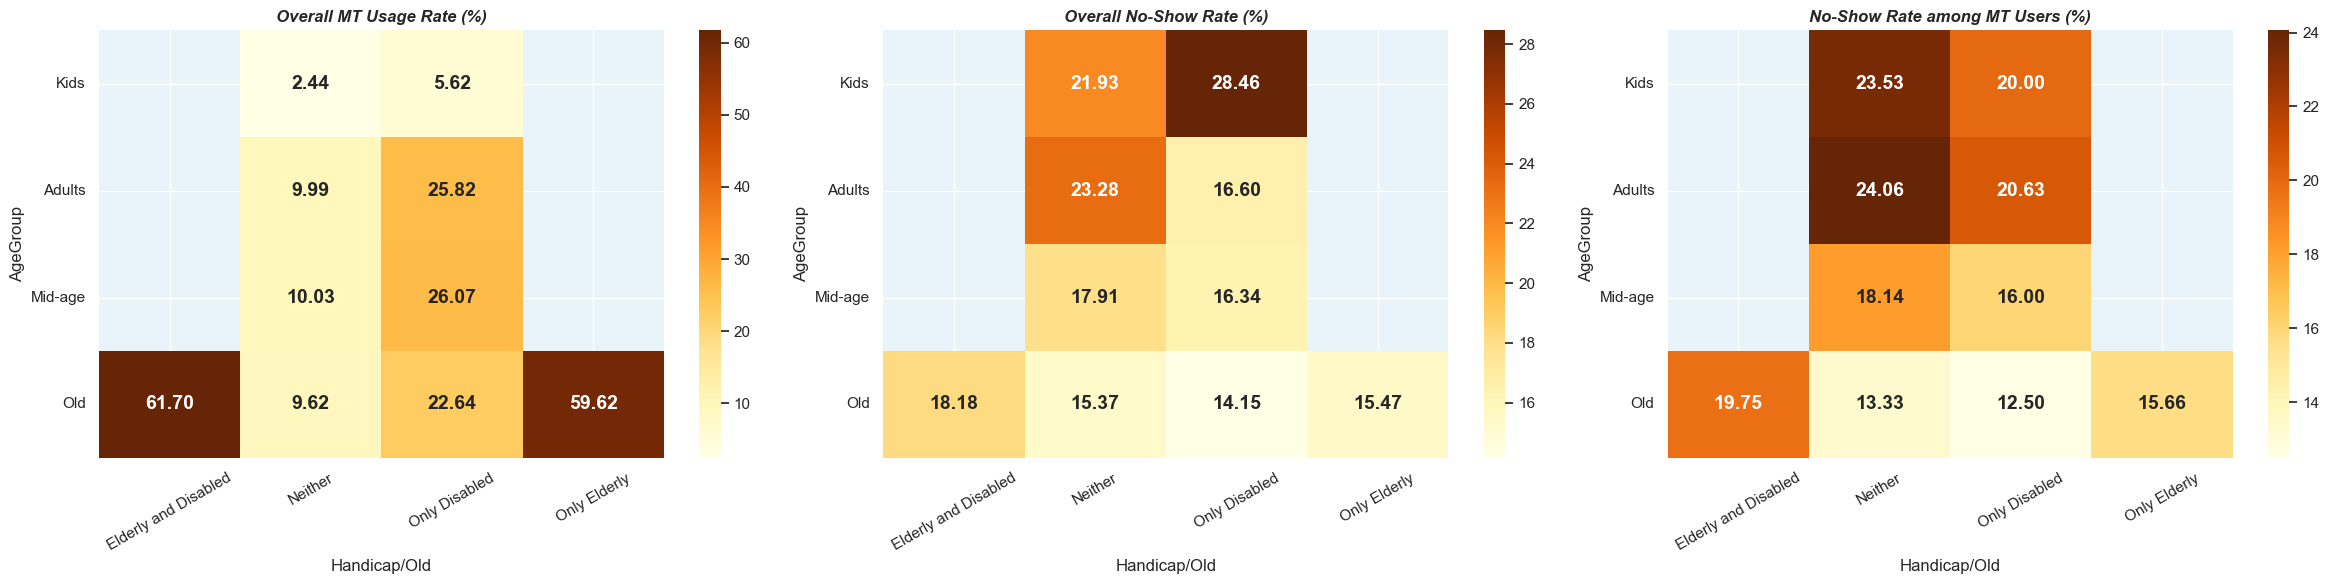

In [189]:
# Reset index so we can pivot easily
# - `pd.crosstab()` creates a **pivot-style DataFrame** (2D matrix), perfect for **heatmaps** and grouped analysis.
# - If we use `reset_index()` on crosstab, it becomes a **flat table** — useful for viewing, adding new columns, or merging.
# - However, to use that flat table in a heatmap, we must pivot it back to 2D matrix format using `.pivot()`.


# Pivot for No-show % by group
df_MTusage_heatmap1 = df_MTusage.reset_index().pivot(index='AgeGroup', columns='Handicap/Old', values='Groupwise_MT_Usage_%')
df_MTusage_heatmap2 = df_MTusage.reset_index().pivot(index='AgeGroup', columns='Handicap/Old', values='Group_NoShowRate')
df_MTusage_heatmap3 = df_MTusage.reset_index().pivot(index='AgeGroup', columns='Handicap/Old', values='MT_NoShowRate')

## To make the percentage values in each cell bold and larger inside your seaborn heatmaps, modify the *annot_kws parameter in sns.heatmap*.

annot = {'size': 14, 'weight': 'bold'}
title_style = {'fontsize': 12, 'weight': 'bold', 'style' : 'italic'}

fig, axs = plt.subplots(ncols=3,figsize=(24,6))
sns.heatmap(df_MTusage_heatmap1, annot=True, cmap="YlOrBr", fmt=".2f", ax=axs[0], xticklabels=True, yticklabels=True, annot_kws=annot)
axs[0].set_title("Overall MT Usage Rate (%)", title_style)
axs[0].tick_params(axis='x', rotation=30)
axs[0].tick_params(axis='y', rotation=360)
axs[0].set_facecolor('#e8f4fa')

sns.heatmap(df_MTusage_heatmap2, annot=True, cmap="YlOrBr", fmt=".2f", ax = axs[1], xticklabels=True, yticklabels=True, annot_kws=annot)
axs[1].set_title("Overall No-Show Rate (%)", title_style)
axs[1].tick_params(axis='x', rotation=30)
axs[1].tick_params(axis='y', rotation=360)
axs[1].set_facecolor('#e8f4fa')

sns.heatmap(df_MTusage_heatmap3, annot=True, cmap="YlOrBr", fmt=".2f", ax =axs[2], xticklabels=True, yticklabels=True, annot_kws=annot)
axs[2].set_title("No-Show Rate among MT Users (%)", title_style)
axs[2].tick_params(axis='x', rotation=30)
axs[2].tick_params(axis='y', rotation=360)
axs[2].set_facecolor('#e8f4fa')

plt.tight_layout()
plt.show()            #To rotate tick labels for each individual subplot, you need to use axs[i].tick_params() or loop through axes.

Our data shows that while Medical Transport usage peaks among elderly and handicapped patients (up to 66%), it doesn’t guarantee attendance. For example:
- 61.70% old and Disabled uses transport, but 20.13% still miss appointments. 61.76% Old uses transport and misses 14.29%.
- Kids with disability show the highest no-show rate (28.46%) despite low MT usage (5.62%), and those who use MT still miss 20%
- Adults without elderly/disabled tag use MT at 9.99%, but still have a 24% no-show rate, which is second-highest.

Transport removes one barrier, but not all. Missed appointments may still occur due to Missed or unclear confirmation.

In [190]:
df_MTusage_chi = pd.crosstab([df['AgeGroup'],df['Handicap/Old']], df['Medical_Transport'] )
chi2, p, dof, expected = chi2_contingency(df_MTusage_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


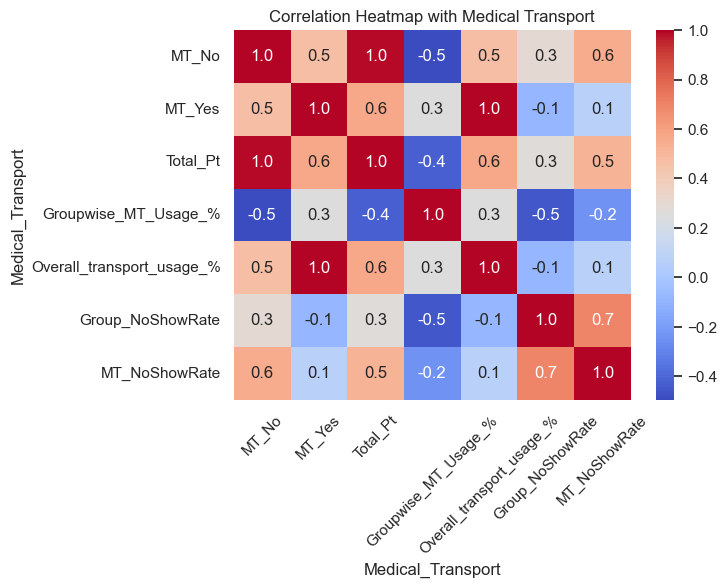

In [191]:
corr = df_MTusage.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f")
plt.xticks(rotation=45)
plt.title("Correlation Heatmap with Medical Transport")
plt.show()


##### **Reminder channel** — This column indicates if the patient was reminded and which communication channel was used.

In [192]:
# Reminder channel assigned based on whether SMS was received.
# Patients not receiving SMS are randomly assigned Phone, Email, or None with weighted probabilities.

np.random.seed(42)
def assign_reminder_channel(reminder):
  if reminder['SMS_received'] ==1:
    return 'SMS'
  if reminder['No-show']==1:
    return np.random.choice(['Phone','E-mail','None'], p=(0.1, 0.3, 0.6))
  else:
    return np.random.choice(['Phone','E-mail','None'], p=(0.5, 0.35, 0.15))

df['Reminder_channel'] = df.apply(assign_reminder_channel, axis=1)

In [193]:
df['Reminder_channel'].unique()

array([np.str_('Phone'), np.str_('None'), np.str_('E-mail'), 'SMS'],
      dtype=object)

In [194]:
print("[underline] [bold] Missing values in New dataset: [/bold] [/underline]")  # Check for missing values in new df
print(df.isnull().sum())

[underline] [bold] Missing values in New dataset: [/bold] [/underline]
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
No-show              0
AgeGroup             0
WaitingDays          0
Appointment_Day      0
Medical_Transport    0
Handicap/Old         0
MT_Label             0
Reminder_channel     0
dtype: int64


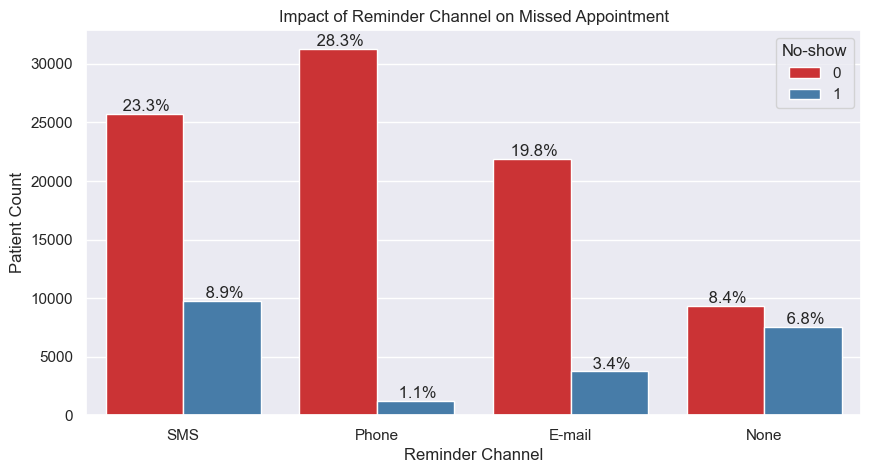

In [195]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x = 'Reminder_channel', hue ='No-show', order = df['Reminder_channel'].value_counts().index)
for container in ax.containers:
  ax.bar_label(container, labels = [f'{(v.get_height()/len(df))*100: .1f}%' for v in container])
plt.title('Impact of Reminder Channel on Missed Appointment')
plt.xlabel('Reminder Channel')
plt.ylabel('Patient Count')
plt.show()

From the bar chart:
- SMS: Highest no-show
- Phone: Highest show rate (very low no-show)
- Email: Moderate
- None: Worst performance (Lowest show rate with second-highest No-show)

In [196]:
df_RemChan_chi = pd.crosstab(df['Reminder_channel'] , df['No-show'])  #Reminder channel strongly affects attendance
chi2, p, dof, expected = chi2_contingency(df_RemChan_chi)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


p < 0.05, Reminder channel significantly affects attendance

In [197]:
df_RemChan_ct = pd.crosstab([df['Reminder_channel'],df['AgeGroup']] , df['No-show'])
df_RemChan_ct = df_RemChan_ct.rename(columns= {0:'Showed', 1: 'No-showed'})
df_RemChan_ct['Total Patients'] = df_RemChan_ct['Showed'] + df_RemChan_ct['No-showed']
df_RemChan_ct['Noshow % per RemChannel'] = (df_RemChan_ct['No-showed']/df_RemChan_ct['Total Patients']) *100
df_RemChan_ct.reset_index(inplace=True)
print(df_RemChan_ct)

No-show Reminder_channel AgeGroup  Showed  No-showed  Total Patients  \
0                 E-mail     Kids    5939       1119            7058   
1                 E-mail   Adults    5980       1171            7151   
2                 E-mail  Mid-age    7171       1112            8283   
3                 E-mail      Old    2822        335            3157   
4                   None     Kids    2402       2262            4664   
5                   None   Adults    2559       2247            4806   
6                   None  Mid-age    3124       2249            5373   
7                   None      Old    1217        807            2024   
8                  Phone     Kids    8312        383            8695   
9                  Phone   Adults    8680        376            9056   
10                 Phone  Mid-age   10308        347           10655   
11                 Phone      Old    3995        127            4122   
12                   SMS     Kids    5866       2583            

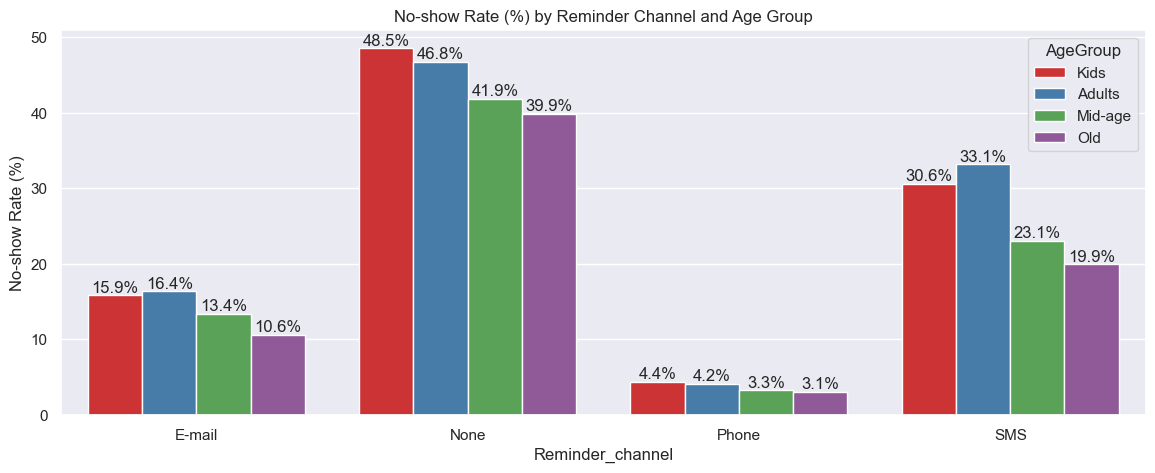

In [198]:
plt.figure(figsize=(14,5))          ## Which reminder method is most effective for which age group?
ax = sns.barplot(data=df_RemChan_ct, x = 'Reminder_channel' ,y='Noshow % per RemChannel', hue = 'AgeGroup', errorbar=None)
for container in ax.containers:
  ax.bar_label(container, fmt= '%.1f%%' )
plt.title('No-show Rate (%) by Reminder Channel and Age Group')
plt.xlabel('Reminder_channel')
plt.xticks(rotation=360)
plt.ylabel('No-show Rate (%)')
plt.show()

#### Higher % indicates less effective reminder method for that group.
 - Phone is the most effective method across all age groups.No-show rates stay below 5% across Kids, Adults, Mid-age, and Old. Hospitals should prioritize phone calls, especially for seniors and high-risk patients.
- No reminder leads to the worst no-show rates. 46%–48% no-show rates for Kids and Adults accounts for highest across all categories. This shows the importance of reminder systems, especially for first-time visits or younger patients.
- Kids and Adults still no-show ~30–33% of the time with SMS. But Mid-age (23%) and Old (20%) respond better.
- Email reduces some of the no-shows but still account for 11-17% no shows. Email alone isn't enough but can be useful for working professionals.

Reminders are most effective when personalized (Phone > Email > SMS > None).

In [199]:
df_RemChan_chi = pd.crosstab([df['Reminder_channel'],df['AgeGroup']] , df['No-show'])   ## Reminder methods work differently for different ages
chi2, p, dof, expected = chi2_contingency(df_RemChan_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


In [200]:
## How Reminder_channels and MT users are connected to No-show?

df_MT_RC_Noshow_ct = pd.crosstab([df['Reminder_channel'], df['Medical_Transport']], df['No-show']).reset_index()
df_MT_RC_Noshow_ct = df_MT_RC_Noshow_ct.rename(columns= {0: 'Showed', 1:'No-showed'})
df_MT_RC_Noshow_ct['No-show rate(%)'] = (df_MT_RC_Noshow_ct['No-showed']/ (df_MT_RC_Noshow_ct['Showed'] + df_MT_RC_Noshow_ct['No-showed']) *100).round(1)
df_MT_RC_Noshow_ct.head(20)

No-show,Reminder_channel,Medical_Transport,Showed,No-showed,No-show rate(%)
0,E-mail,0,19160,3317,14.8
1,E-mail,1,2752,420,13.2
2,None,0,8143,6646,44.9
3,None,1,1159,919,44.2
4,Phone,0,27335,1096,3.9
5,Phone,1,3960,137,3.3
6,SMS,0,22413,8693,27.9
7,SMS,1,3285,1091,24.9


In [201]:
## .size().reset_index(name='Column Name' will create new dataframe with new column.

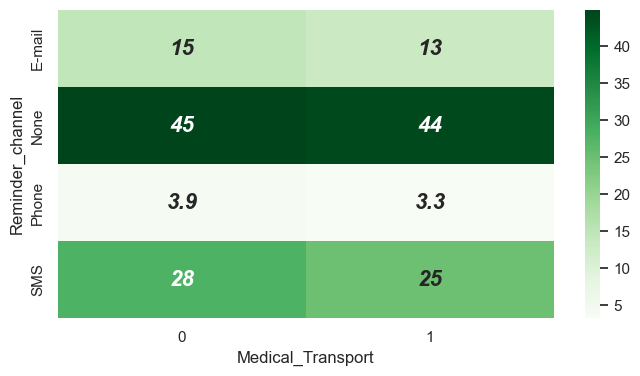

In [202]:
plt.figure(figsize=(8,4))
annot = {'size': 16, 'weight': 'bold', 'style': 'italic' }
MT_RC_NS_heatmap = df_MT_RC_Noshow_ct.pivot(index = 'Reminder_channel', columns= 'Medical_Transport', values='No-show rate(%)')
sns.heatmap(MT_RC_NS_heatmap, annot=True, cmap = 'Greens', annot_kws=annot)
plt.show()

#### This heatmap explores how different combinations of Reminder Channel and Medical Transport usage affect patient No-show Rates.
- Patients who received phone calls had the lowest no-show rate (3.8%), regardless of whether they used transport.
- For SMS and Email users, those with medical transport had slightly better attendance, suggesting the transport provider may have contacted the patient, reinforcing the reminder.
- Patients who received no reminder at all had the highest no-show rates (43–44%), emphasizing the critical role of communication.

In [203]:
df_MT_RC_Noshow_chi = pd.crosstab([df['Reminder_channel'], df['Medical_Transport']], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_MT_RC_Noshow_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


###**First Visit** = Adding First time visitor for clinic

In [204]:
# Adding column First_Visit indicating if this is the patient's first visit to the clinic.
# Assumption: 20% are new (first-time) visitors.

np.random.seed(42)
df['First_Visit'] = np.random.choice(['Yes', 'No'], size = len(df), p=(0.20, 0.80))

In [205]:
df['First_Visit'].unique()

array(['No', 'Yes'], dtype=object)

In [206]:
# Calculate total patients and no-show percentage for first vs repeat visitors

df_FirstV_NS_ct = pd.crosstab(df['First_Visit'], df['No-show']).reset_index()
df_FirstV_NS_ct = df_FirstV_NS_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_FirstV_NS_ct['Total_Patients'] = df_FirstV_NS_ct['Showed'] + df_FirstV_NS_ct['No-showed']
df_FirstV_NS_ct['No-show %'] = ((df_FirstV_NS_ct['No-showed']/df_FirstV_NS_ct['Total_Patients']) *100).round(2)
print(df_FirstV_NS_ct)

No-show First_Visit  Showed  No-showed  Total_Patients  No-show %
0                No   70624      17780           88404      20.11
1               Yes   17583       4539           22122      20.52


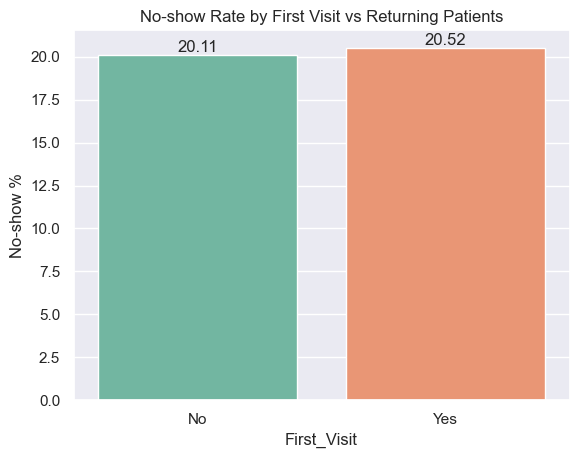

In [207]:
ax = sns.barplot(data = df_FirstV_NS_ct, x = 'First_Visit', y = 'No-show %', hue = 'First_Visit',palette='Set2')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show Rate by First Visit vs Returning Patients')
plt.show()

In [208]:
df_FirstV_NS_chi = pd.crosstab(df['First_Visit'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_FirstV_NS_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

Not significant.
0.1817620731605347


- New visitors and repeat patients behave similarly in terms of appointment attendance.
- p = 0.18 (>0.05) First Visit status does not significantly influence No-Show behavior.

In [209]:
df_FV_RC_ct = pd.crosstab(df['First_Visit'], df['Reminder_channel'], normalize='index')
print(df_FV_RC_ct)

Reminder_channel    E-mail      None     Phone       SMS
First_Visit                                             
No                0.234130  0.152312  0.294285  0.319273
Yes               0.223804  0.153784  0.294368  0.328044


- Reminder channel distribution is almost identical between first-time and repeat patients.
- Suggests uniform reminder strategies were applied regardless of patient visit type.

#### **Patient confirmed:** This column indicates whether the patient confirmed their appt and still No-showed
##### Assumption: 80% of patients confirm their appointment.

#### Real-world Insight:
1. Confirmation helps patients remember appointments. No confirmation = higher risk of no-show.
2. This field adds operational realism and connects with reminder outreach policies.

#### Future Consideration: Clinics can reduce no-shows by automating reminders + confirmations via SMS or call.

In [210]:
# Assigning patient confirmation probability based on age and reminder channel
# Higher confirmation via phone/SMS, lower among elderly or unreminded patients

np.random.seed(42)
def assign_patient_confirmation(row):
  if row['Age'] >85:                            # Very old patients are less likely to confirm.
    return (int(np.random.rand() < 0.1))
  elif row['Reminder_channel'] == 'Phone' and row['Age'] <=45 and row['No-show']==1:  # Young patients (<45) who got Phone call but still missed their appt.
    return (int(np.random.rand() < 0.15))     # They might have confirmed but forgot
  elif row['Reminder_channel'] == 'Phone':  # 40% confirm via phone
    return (int(np.random.rand() < 0.4))
  elif row['Reminder_channel'] == 'SMS' and row['Age'] >=70 and row['No-show']==1:  #Lower SMS response ampng Elderly who got SMS and still didn’t show
    return (int(np.random.rand() < 0.30))
  elif row['Reminder_channel'] == 'E-mail' and row['Age'] >=65 and row['No-show']==1: ## Elderly + email = low confirmation
    return (int(np.random.rand() < 0.10))
  elif row['Reminder_channel'] == 'SMS':      # 80% confirm via SMS (young, tech savvy)
    return (int(np.random.rand() < 0.80))
  elif row['Reminder_channel'] == 'None' and row['No-show']==0:  #People who got no reminder but still showed up
      return (int(np.random.rand() < 0.3))
  else:
    return (int(np.random.rand() < 0.2))      # Default 20% confirmation

df['Pt_confirmed'] = df.apply(assign_patient_confirmation, axis = 1)
df['Pt_confirmed'] = df['Pt_confirmed'].map({0: 'No', 1: 'Yes'})

In [211]:
df['Pt_confirmed'].isna().sum()

np.int64(0)

In [212]:
df_PtConf_Noshow_ct = pd.crosstab([df['Reminder_channel'],df['Pt_confirmed']] , df['No-show']).reset_index()
df_PtConf_Noshow_ct = df_PtConf_Noshow_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_PtConf_Noshow_ct['Total_Patients'] = df_PtConf_Noshow_ct['Showed'] + df_PtConf_Noshow_ct['No-showed']
df_PtConf_Noshow_ct['No-show rate(%)'] = ((df_PtConf_Noshow_ct['No-showed']/df_PtConf_Noshow_ct['Total_Patients']) *100).round(1)
df_PtConf_Noshow_ct['Show rate(%)'] = ((df_PtConf_Noshow_ct['Showed']/df_PtConf_Noshow_ct['Total_Patients']) *100).round(1)
df_PtConf_Noshow_ct.head(20)

No-show,Reminder_channel,Pt_confirmed,Showed,No-showed,Total_Patients,No-show rate(%),Show rate(%)
0,E-mail,No,17714,3054,20768,14.7,85.3
1,E-mail,Yes,4198,683,4881,14.0,86.0
2,None,No,6556,6004,12560,47.8,52.2
3,None,Yes,2746,1561,4307,36.2,63.8
4,Phone,No,18912,952,19864,4.8,95.2
5,Phone,Yes,12383,281,12664,2.2,97.8
6,SMS,No,5214,2231,7445,30.0,70.0
7,SMS,Yes,20484,7553,28037,26.9,73.1


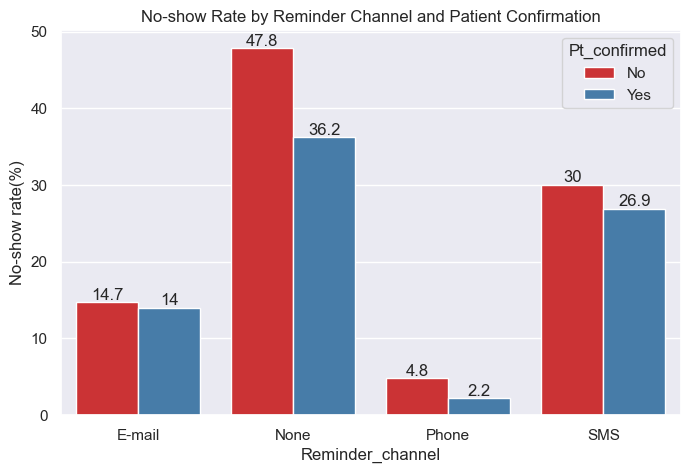

In [213]:
plt.figure(figsize=(8,5))
ax = sns.barplot(data = df_PtConf_Noshow_ct, x = 'Reminder_channel', y = 'No-show rate(%)', hue = 'Pt_confirmed')
for container in ax.containers:
  ax.bar_label(container)
plt.title('No-show Rate by Reminder Channel and Patient Confirmation')
plt.show()

In [214]:
df_PtConf_Noshow_chi = pd.crosstab([df['Reminder_channel'], df['Pt_confirmed']], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_PtConf_Noshow_chi) ## Chi test to confirm if column should be added in modelling
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

p < 0.05 - Significant association. Keep this feature.
0.0


- Bars represent the percentage of appointments missed within each reminder type, split by whether patients confirmed their appointment.
- Phone-confirmed patients had the lowest no-show rate (2.2%), while unconfirmed patients with no reminders no-showed the highest at 47.8%.
- p = 0.0, Reject the null hypothesis. There is a statistically significant relationship between reminder channel, patient confirmation, and attendance.

In [215]:
print("[bold] [underline]\nMissing values in New dataset: [/underline][/bold]")  # Check for missing values in new df
print(df.isnull().sum())

[bold] [underline]
Missing values in New dataset: [/underline][/bold]
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
No-show              0
AgeGroup             0
WaitingDays          0
Appointment_Day      0
Medical_Transport    0
Handicap/Old         0
MT_Label             0
Reminder_channel     0
First_Visit          0
Pt_confirmed         0
dtype: int64


**Analyzing Impact of Gender on No-show**

In [216]:
df_Gender_Noshow_ct = pd.crosstab(df['Gender'], df['No-show']).reset_index()
df_Gender_Noshow_ct = df_Gender_Noshow_ct.rename(columns= {0: 'Showed', 1: 'No-showed'})
df_Gender_Noshow_ct['Total_Patients'] = df_Gender_Noshow_ct['Showed'] + df_Gender_Noshow_ct['No-showed']
df_Gender_Noshow_ct['Noshow rate(%)'] = df_Gender_Noshow_ct['No-showed']/df_Gender_Noshow_ct['Total_Patients'] *100
print(df_Gender_Noshow_ct)

No-show Gender  Showed  No-showed  Total_Patients  Noshow rate(%)
0            F   57245      14594           71839       20.314871
1            M   30962       7725           38687       19.967948


In [217]:
df_Gender_Noshow_chi = pd.crosstab(df['Gender'], df['No-show'])
chi2, p, dof, expected = chi2_contingency(df_Gender_Noshow_chi)
if p < 0.05:
  print("p < 0.05 - Significant association. Keep this feature.")
else: print("Not significant.")
print(p)

Not significant.
0.17303416173736577


**Chi-square p-value > 0.05**, there is no statistically significant relationship between gender and no-show rate. Both male and female patients are equally likely to miss appointments.

In [218]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,...,No-show,AgeGroup,WaitingDays,Appointment_Day,Medical_Transport,Handicap/Old,MT_Label,Reminder_channel,First_Visit,Pt_confirmed
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,...,0,Mid-age,Same Day,Friday,0,Neither,No,Phone,No,Yes
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,...,0,Mid-age,Same Day,Friday,0,Neither,No,None,No,No
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,...,0,Mid-age,Same Day,Friday,0,Neither,No,E-mail,No,No
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,...,0,Kids,Same Day,Friday,0,Neither,No,E-mail,No,No
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,...,0,Mid-age,Same Day,Friday,0,Neither,No,Phone,Yes,Yes


In [219]:
df = df.drop(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received' ], axis=1)
df.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No-show,AgeGroup,WaitingDays,Appointment_Day,Medical_Transport,Handicap/Old,MT_Label,Reminder_channel,First_Visit,Pt_confirmed
0,0,1,0,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,Phone,No,Yes
1,0,0,0,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,None,No,No
2,0,0,0,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,E-mail,No,No
3,0,0,0,0,0,0,Kids,Same Day,Friday,0,Neither,No,E-mail,No,No
4,0,1,1,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,Phone,Yes,Yes


In [220]:
df.to_csv('noshow_analysis_synthetic.csv', index=False)
df = pd.read_csv('noshow_analysis_synthetic.csv')
df.head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No-show,AgeGroup,WaitingDays,Appointment_Day,Medical_Transport,Handicap/Old,MT_Label,Reminder_channel,First_Visit,Pt_confirmed
0,0,1,0,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,Phone,No,Yes
1,0,0,0,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,NaN,No,No
2,0,0,0,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,E-mail,No,No
3,0,0,0,0,0,0,Kids,Same Day,Friday,0,Neither,No,E-mail,No,No
4,0,1,1,0,0,0,Mid-age,Same Day,Friday,0,Neither,No,Phone,Yes,Yes
